<a href="https://colab.research.google.com/github/Aditi-24-05/Optimization_Techniques/blob/main/Rosenbrock_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Rosenbrock Optimization**

**Importing Libraries**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import builtins
from scipy.optimize import minimize_scalar

 # Rosenbrock function

 Rosenbrock function is a non-convex function which is used as a performance test problem for optimization algorithms.The function is defined by:

 $$ f(x,y)=(a-x)^2+b(y-x^2)^2 $$

In [ ]:
# Rosenbrock function
def rosenbrock(x, y, a=1, b=100):
    return (a - x)**2 + b * (y - x**2)**2

# Gradient of Rosenbrock
 $$ \frac{\partial f}{\partial x} = -2(1 - x) - 400x(y - x^2) $$
 $$ \frac{\partial f}{\partial y} = 200(y - x^2) $$

This gradient is required in optimization algorithms



In [ ]:
# Gradient of the Rosenbrock function
def rosenbrock_gradient(x, y, a=1, b=100):
    df_dx = -2 * (a - x) - 4 * b * x * (y - x**2)
    df_dy = 2 * b * (y - x**2)
    return np.array([df_dx, df_dy], dtype=np.float64)

# **Gradient Descent**

The gradient descent algorithm iteratively minimizes a function by starting from an initial guess and moving in the direction of the negative gradient, which points toward the steepest descent. Each step adjusts the position by a fraction (learning rate 𝛼) of the gradient until the gradient's magnitude is less than a specified threshold 𝜖, indicating convergence near a minimum. The result is the function's approximate local minimum and the path taken to reach it.


**Advantage:** Simple to implement and widely applicable for smooth, convex functions.

**Disadvantage:** Can get stuck in local minima and is sensitive to the choice of learning rate.

In [ ]:
# Gradient Descent Algorithm
def gradient_descent(grad_f, init, alpha, epsilon, max_iter=10000):
    x, y = init  # Initial guess
    path = [init]

    for _ in range(max_iter):
        df_dx, df_dy = grad_f(x, y)

        # Check stopping criteria
        grad_norm = np.sqrt(df_dx**2 + df_dy**2)
        if grad_norm < epsilon:
            break

        # Update the position
        x = x - alpha * df_dx
        y = y - alpha * df_dy

        path.append((x, y))

    return (x, y), np.array(path)

init = (-1, 2)
alpha = 0.001     # Learning rate
epsilon = 1e-6    # Stopping threshold

min, gd_path = gradient_descent(rosenbrock_gradient, init, alpha, epsilon)
print("Local minimum found at:", min)

Local minimum found at: (0.9907133618967138, 0.981475595927456)


# **Golden Section Search**
The gradient descent with Golden Section Search algorithm optimizes the step size
𝛼 in each iteration to ensure efficient progress toward the function’s minimum.

**Adavantage**:
By adaptively choosing
𝛼, it avoids manually setting a fixed learning rate, which can be too large (causing overshooting) or too small (slowing convergence).

**Disadvantage**: It is computationally intensive due to the repeated function evaluations required for each step size adjustment.

Best for small-scale or low-dimensional problems where precision in step size matters more than speed.

In [ ]:
# Golden Section Search for step size (alpha) optimization
def golden_section_search(current_pos, gradient, epsilon=1e-5):
    alpha_low, alpha_high = 0, 1
    golden_ratio = (math.sqrt(5) - 1) / 2
    alpha1 = alpha_low + (1 - golden_ratio) * (alpha_high - alpha_low)
    alpha2 = alpha_low + golden_ratio * (alpha_high - alpha_low)

    # Use Golden Section to find the best alpha
    while abs(alpha_high - alpha_low) > epsilon:
        f_alpha1 = rosenbrock(current_pos[0] - alpha1 * gradient[0], current_pos[1] - alpha1 * gradient[1])
        f_alpha2 = rosenbrock(current_pos[0] - alpha2 * gradient[0], current_pos[1] - alpha2 * gradient[1])

        if f_alpha1 < f_alpha2:
            alpha_high = alpha2
            alpha2 = alpha1
            alpha1 = alpha_low + (1 - golden_ratio) * (alpha_high - alpha_low)
        else:
            alpha_low = alpha1
            alpha1 = alpha2
            alpha2 = alpha_low + golden_ratio * (alpha_high - alpha_low)

    return (alpha_low + alpha_high) / 2

# Gradient Descent using Golden Section Search for Step Size
def gradient_descent_with_golden_section(rosenbrock_func, gradient_func, initial_pos, epsilon=1e-5, max_iter=1000):
    current_pos = np.array(initial_pos)
    gr_path = [current_pos]

    for _ in range(max_iter):
        gradient = gradient_func(current_pos[0], current_pos[1])

        alpha = golden_section_search(current_pos, gradient, epsilon)

        current_pos = current_pos - alpha * gradient

        gr_path.append(current_pos)

        # Stop if gradient is small enough
        if np.linalg.norm(gradient) < epsilon:
            break

    return np.array(gr_path)

initial_position = [-1, 2]
gr_path = gradient_descent_with_golden_section(rosenbrock, rosenbrock_gradient, initial_position)

local_minimum = gr_path[-1]
print("Local minimum found at:", local_minimum)

Local minimum found at: [0.90678312 0.82159296]


# **Armijo Rule with backtracking**
The Armijo backtracking method in gradient descent dynamically adjusts the step size
𝛼 to ensure sufficient decrease in the function at each iteration.

**Advantage**:It avoids the need for a manually fixed learning rate, allowing larger steps when possible and reducing
𝛼 to prevent overshooting.

**Disadvantage**:
Very small values of 𝛼 (k) can satisfy this condition.

Best for large-scale or high-dimensional optimization where speed is crucial.

In [ ]:
# Gradient Descent with Armijo Backtracking
def gradient_descent_armijo(f, grad_f, x_init, epsilon=1e-6, max_iter=1000, alpha_init=1.0, c1=1e-4, beta=0.5):
    x_k = np.array(x_init)
    arm_path = [x_k]
    k = 0

    while k < max_iter:
        grad = grad_f(x_k[0], x_k[1])
        grad_norm = np.linalg.norm(grad)

        if grad_norm < epsilon:
            break

        # Armijo backtracking line search
        alpha = alpha_init
        while f(x_k[0] - alpha * grad[0], x_k[1] - alpha * grad[1]) > f(x_k[0], x_k[1]) - c1 * alpha * np.dot(grad, grad):
            alpha *= beta

        x_k = x_k - alpha * grad
        arm_path.append(x_k)

        k += 1

    return x_k, np.array(arm_path)

x_init = (-1, 2)
epsilon = 1e-6

x_min, arm_path = gradient_descent_armijo(rosenbrock, rosenbrock_gradient, x_init, epsilon)
print("Local minimum found at:", x_min)

Local minimum found at: [0.97145074 0.94370719]


# **Momentum based Gradient Descent**
Accelerates gradient descent by incorporating past gradients, which helps to smooth out the trajectory and potentially
speed up convergence. It overcomes oscillations in steep or narrow regions, which can slow down standard gradient descent.

**Advantage:**
Moves faster along consistent gradient directions, leading to quicker convergence than basic gradient descent.

**Disadvantage:**
May overshoot the minimum if hyperparameters learning rate (𝛼) or momentum coefficient (𝛾) are not carefully tuned.

In [ ]:
# Momentum-based Gradient Descent Algorithm
def momentum_gradient_descent(f, grad_f, mgd_init, mgd_alpha, mgd_gamma, mgd_epsilon, mgd_max_iter=10000):
    mgd_x, mgd_y = mgd_init
    mgd_vx, mgd_vy = 0.0, 0.0  # Initial momentum for x and y
    mgd_path = [(mgd_x, mgd_y)]
    mgd_k = 0

    while mgd_k < mgd_max_iter:
        mgd_grad_x, mgd_grad_y = grad_f(mgd_x, mgd_y)

        mgd_grad_norm = np.sqrt(mgd_grad_x**2 + mgd_grad_y**2)
        if mgd_grad_norm < mgd_epsilon:
            break

        mgd_vx = mgd_gamma * mgd_vx + mgd_alpha * mgd_grad_x
        mgd_vy = mgd_gamma * mgd_vy + mgd_alpha * mgd_grad_y
        mgd_x -= mgd_vx
        mgd_y -= mgd_vy

        mgd_path.append((mgd_x, mgd_y))

        mgd_k += 1

    return np.array(mgd_path), (mgd_x, mgd_y)

mgd_init = (-1, 2)
mgd_alpha = 0.001
mgd_gamma = 0.9  # Momentum coefficient
mgd_epsilon = 1e-6

mgd_path, mgd_optimal_point = momentum_gradient_descent(rosenbrock, rosenbrock_gradient, mgd_init, mgd_alpha, mgd_gamma, mgd_epsilon)

print("Local minimum found at:", mgd_optimal_point)

Local minimum found at: (0.9999988830414394, 0.9999977616145043)


# **Nesterov Gradient Descent Algorithm**
Improves upon momentum-based methods by incorporating a lookahead step, which allows it to anticipate the next position before updating, leading to more accurate gradient updates.

**Advantage:**
The lookahead step improves the accuracy of the gradient, speeding up convergence and reduces the chance of overshooting the minimum, especially near flat regions or steep valleys.

**Disadvantage:**
Computationally expensive and adjustments of 2 hyperparameters.

In [ ]:
# Nesterov Gradient Descent Algorithm
def nesterov_gradient_descent(f, grad_f, ngd_init, ngd_alpha, ngd_gamma, ngd_epsilon, ngd_max_iter=10000):
    ngd_x = np.array(ngd_init, dtype=float)
    ngd_v = np.zeros_like(ngd_x)  # Initial momentum vector
    ngd_path = [ngd_init]
    ngd_k = 0

    while ngd_k < ngd_max_iter:
        # Compute lookahead position
        ngd_x_lookahead = ngd_x - ngd_gamma * ngd_v

        # Compute the gradient at the lookahead position
        ngd_grad = grad_f(ngd_x_lookahead[0], ngd_x_lookahead[1])

        ngd_v = ngd_gamma * ngd_v + ngd_alpha * ngd_grad
        ngd_x = ngd_x - ngd_v
        ngd_path.append(ngd_x.copy())

        if np.linalg.norm(ngd_grad) < ngd_epsilon:
            break

        ngd_k += 1

    return np.array(ngd_path), ngd_x


# Parameters
ngd_init = (-1, 2)
ngd_alpha = 0.001
ngd_gamma = 0.9
ngd_epsilon = 1e-6

ngd_path, ngd_optimal_point = nesterov_gradient_descent(rosenbrock, rosenbrock_gradient, ngd_init, ngd_alpha, ngd_gamma, ngd_epsilon)

print("Local minimum found at:", ngd_optimal_point)

Local minimum found at: [0.99999888 0.99999776]


# **Stochastic Gradient Descent**
It updates the model parameters using the gradient of a random subset of data, introducing noise into each step. This stochastic nature allows it to escape local minima and converge faster compared to standard Gradient Descent, especially on large datasets.

**Advantage:** The noise introduced by stochastic updates can help avoid local minima and improve the model's ability to generalize to unseen data.

**Disadvantage:** A single, fixed learning rate that may be inefficient for complex landscapes.

This disadvantage can be seen in our plot below.In SGD, a single learning rate applies globally to all parameters at every iteration. If this rate is too high, SGD oscillates around narrow regions, and if it’s too low, it can slow down before reaching the minimum. For the Rosenbrock function, if the rate isn’t adapted to follow the curved valley, the optimization ends up at a less optimal point.

In [ ]:
# Stochastic Gradient Descent (SGD)
def stochastic_gradient_descent(rosenbrock_func, grad_f, init_pos, alpha, num_iterations, epsilon, noise_factor=0.3):
    point_sgd = np.array(init_pos)
    sgd_path = [point_sgd]

    for i in range(num_iterations):
        grad = grad_f(point_sgd[0], point_sgd[1]) + np.random.randn(2) * noise_factor
        grad_norm = np.linalg.norm(grad)

        grad = grad if grad_norm < 10 else grad / grad_norm * 10

        if grad_norm < epsilon:
            break

        point_sgd -= alpha * grad
        sgd_path.append(point_sgd.copy())

        noise_factor *= 0.995

    return np.array(sgd_path), point_sgd

initial_sgd = [-1.0, 2.0]
alpha = 0.04
num_iterations = 10000
epsilon = 1e-6
noise_factor = 0.1

sgd_path, sgd_optimal_point = stochastic_gradient_descent(rosenbrock, rosenbrock_gradient, initial_sgd, alpha, num_iterations, epsilon, noise_factor)

print("Local minimum found at:", sgd_optimal_point)

Local minimum found at: [0.0506582  0.28514322]


**Generates a contour plot of the Rosenbrock function with paths representing the optimization trajectories of Gradient Descent, Armijo Gradient Descent, and Golden Ratio methods, marking the optimal point (1, 1).**




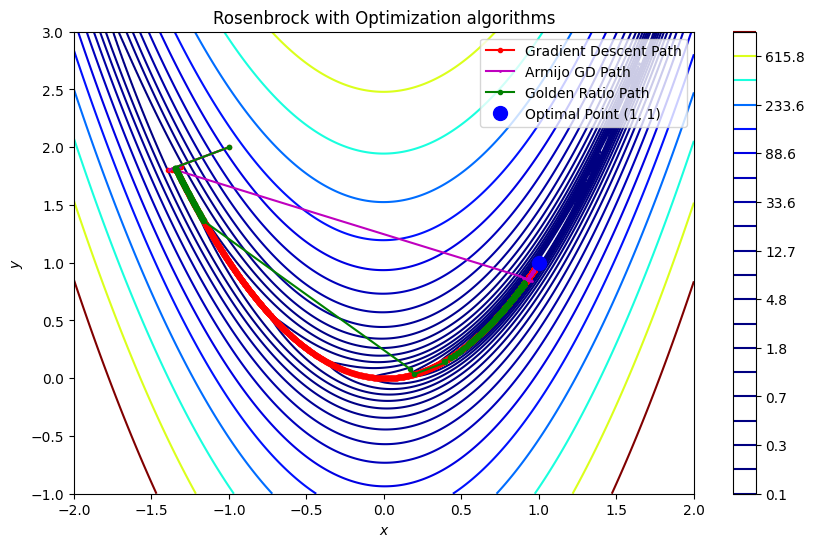

In [ ]:
x1_vals = np.linspace(-2, 2, 400)
x2_vals = np.linspace(-1, 3, 400)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = rosenbrock(X1, X2)

plt.figure(figsize=(10, 6))
plt.contour(X1, X2, Z, levels=np.logspace(-1, 3, 20), cmap='jet')

# Plot the Gradient Descent path
plt.plot(gd_path[:, 0], gd_path[:, 1], 'ro-', markersize=3, label='Gradient Descent Path')

# Plot the Armjio Gradient Descent path
plt.plot(arm_path[:, 0], arm_path[:, 1], 'mo-', markersize=1, label='Armijo GD Path')

# Plot the Golden Ratio Path
plt.plot(gr_path[:, 0], gr_path[:, 1], 'go-', markersize=3, label='Golden Ratio Path')

plt.plot(1, 1, 'bo', markersize=10, label='Optimal Point (1, 1)')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Rosenbrock with Optimization algorithms')
plt.legend()

plt.colorbar()
plt.show()


**Plots the optimization paths of Momentum Gradient Descent (MGD), Nesterov Gradient Descent (NGD), and Stochastic Gradient Descent (SGD), and marks the optimal point at (1, 1).**

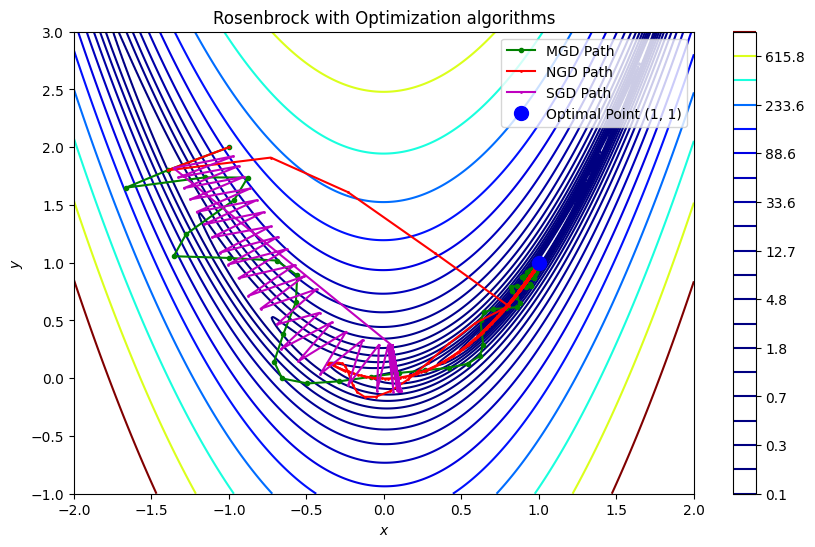

In [ ]:
plt.figure(figsize=(10, 6))
plt.contour(X1, X2, Z, levels=np.logspace(-1, 3, 20), cmap='jet')

# Plot the Momentum Gradient Descent path
plt.plot(mgd_path[:, 0], mgd_path[:, 1], 'go-', markersize=3, label='MGD Path')

# Plot the Nestrov Gradient Descent path
plt.plot(ngd_path[:, 0], ngd_path[:, 1], 'ro-', markersize=1, label='NGD Path')

# Plot the Stochastic Gradient Descent path
plt.plot(sgd_path[:, 0], sgd_path[:, 1], 'mo-', markersize=1, label='SGD Path')

plt.plot(1, 1, 'bo', markersize=10, label='Optimal Point (1, 1)')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Rosenbrock with Optimization algorithms')
plt.legend()

plt.colorbar()
plt.show()


# **Adam**
Adaptive Moment Estimation or Adam combines ideas from momentum and RMSprop by maintaining two moving averages of the gradient.It adjusts the learning rate for each parameter individually by dividing the bias-corrected moment estimate by the square root of the bias-corrected variance estimate.

It overcomes SGD's limitation by adapting learning rate for each parameter individually.

**Advantages:**

Works Well with Sparse Gradients

Quickly optimizes even complex models

**Disadvantages
:**

Memory requirements

Sensitivity to hyper-parameters

Performance on non-convex problems


In [ ]:
def adam_optimizer(start, grad_fn, learning_rate=0.001, beta1=0.9, beta2=0.99, epsilon=1e-8, max_iters=100000):
    w = np.array(start, dtype=np.float64)  # Initial weight vector
    m = np.zeros_like(w)  # First moment vector (mean of gradients)
    v = np.zeros_like(w)  # Second moment vector (uncentered variance)
    path = [w.copy()]

    for k in range(1, max_iters + 1):
        grad = grad_fn(w[0], w[1])

        m = beta1 * m + (1 - beta1) * grad

        v = beta2 * v + (1 - beta2) * (grad ** 2)

        m_hat = m / (1 - beta1 ** k)

        v_hat = v / (1 - beta2 ** k)

        w -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)

        path.append(w.copy())

        if np.linalg.norm(grad) < epsilon:
            print(f"Converged at iteration {k}")
            break

    return np.array(path)


# **Adagrad**
The Adagrad optimizer adjusts the learning rate for each parameter based on the accumulated squared gradients. It scales the learning rate.This results in smaller updates for frequently large gradients and larger updates for sparse gradients, improving stability and convergence.


**Advantage:**
AdaGrad performs well on problems with sparse data (where most values are zero), such as natural language processing and some recommendation systems.

**Disadvantage:**
It requires significant storage and lacks control over accumulation, making it less effective for non-convex problems.

In [ ]:
def adagrad_optimizer(start, grad_fn, learning_rate=0.1, epsilon=1e-6, max_iters=100000):
    w = np.array(start, dtype=np.float64)  # Initial weight vector
    g_accum = np.array([0.0, 0.0])  # Accumulated squared gradients
    path = [w.copy()]

    for k in range(max_iters):
        grad = grad_fn(w[0], w[1])

        if np.linalg.norm(grad) < epsilon:
            break

        g_accum += grad**2

        w -= learning_rate * grad / (np.sqrt(g_accum) + epsilon)

        path.append(w.copy())

    return np.array(path)



# **BFGS**
The Broyden–Fletcher–Goldfarb–Shanno or BFGS optimizer is a Quasi-Newton method that iteratively updates the parameters using an approximation of the inverse Hessian and a line search to determine the step size. It refines the parameter estimates by adjusting the step size based on gradient changes and accumulating information about the curvature of the objective function.

**Advantage:**

BFGS approximates the Hessian matrix, capturing second-order information about the function's curvature without needing to compute the Hessian explicitly. This often makes it faster than methods based on only first-order derivatives.

**Disadvantage:**

Line search can add overhead in some cases, especially for functions where each evaluation is computationally expensive.



In [ ]:
def bfgs_optimizer(f, grad_f, x0, epsilon=1e-6, max_iter=1000):
    x_k = np.array(x0, dtype=np.float64)
    H_k = np.eye(len(x0))  # Initial Hessian (identity matrix)
    path = [x_k.copy()]  # Track the path

    for k in range(max_iter):
        g_k = grad_f(x_k[0], x_k[1])

        if np.linalg.norm(g_k) < epsilon:
            print(f"Converged at iteration {k}")
            break

        p_k = -H_k.dot(g_k)

        # Line search for a step size alpha_k
        alpha_k = 1.0
        while f(x_k[0] + alpha_k * p_k[0], x_k[1] + alpha_k * p_k[1]) > f(x_k[0], x_k[1]) + 0.1 * alpha_k * g_k.dot(p_k):
            alpha_k *= 0.5

        x_k_next = x_k + alpha_k * p_k
        path.append(x_k_next.copy())

        g_k_next = grad_f(x_k_next[0], x_k_next[1])

        delta_k = x_k_next - x_k
        gamma_k = g_k_next - g_k

        rho_k = 1.0 / (gamma_k.dot(delta_k))
        I = np.eye(len(x0))
        H_k = (I - rho_k * np.outer(delta_k, gamma_k)).dot(H_k).dot(I - rho_k * np.outer(gamma_k, delta_k)) + rho_k * np.outer(delta_k, delta_k)

        x_k = x_k_next

    return np.array(path)


In [ ]:
start_point = np.array([-1.0, 2.0])

# Run Adam optimizer
adam_path = adam_optimizer(start_point, rosenbrock_gradient)

# Run AdaGrad optimizer
adagrad_path = adagrad_optimizer(start_point, rosenbrock_gradient)

# Run BFGS optimizer
bfgs_path = bfgs_optimizer(rosenbrock, rosenbrock_gradient, start_point)

x_vals = np.linspace(-2, 2, 400)
y_vals = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = rosenbrock(X, Y)

Converged at iteration 36


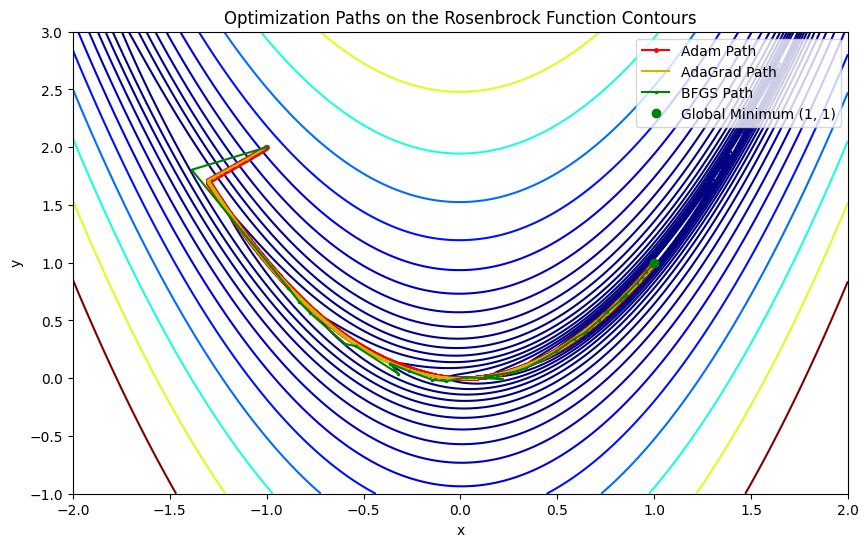

In [ ]:
# Plotting the Rosenbrock function contours and optimizer paths
plt.figure(figsize=(10, 6))
plt.contour(X, Y, Z, levels=np.logspace(-1, 3, 20), cmap="jet")
plt.plot(adam_path[:, 0], adam_path[:, 1], "r.-",markersize=5, label="Adam Path")
plt.plot(adagrad_path[:, 0], adagrad_path[:, 1], "y.-", markersize=1,label="AdaGrad Path")
plt.plot(bfgs_path[:, 0], bfgs_path[:, 1], "g.-", markersize=3,label="BFGS Path")
plt.plot(1, 1, "go", label="Global Minimum (1, 1)")

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Optimization Paths on the Rosenbrock Function Contours")
plt.show()

# **RMSProp**
The Root Mean Square Propagation optimizer uses the root of the moving average of squared gradients to scale the learning rate, making it adaptively smaller for frequently updated parameters and more stable for others. It improves convergence by adjusting the learning rate for each parameter individually and ensures stability with a small epsilon.

**Advantages:**

RMSprop adapts the learning rate for each parameter, leading to faster convergence and improved stability, especially in non-convex problems.

**Disadvantages:**

Lack of Momentum which needs to navigate through flat regions of the optimization landscape.

In [ ]:
def rmsprop_rosenbrock(f, grad_f, W_init, alpha=0.01, beta=0.9, epsilon=1e-8, max_iter=10000):
    W = np.array(W_init, dtype=np.float64)
    G = np.zeros_like(W)
    path = [W.copy()]

    for k in range(max_iter):
        grad = grad_f(W[0], W[1])

        # Accumulate squared gradients with EWMA
        G = beta * G + (1 - beta) * grad**2

        W = W - alpha / (np.sqrt(G) + epsilon) * grad
        path.append(W.copy())

        if np.linalg.norm(grad) < epsilon:
            break

    return W, f(W[0], W[1]), k, np.array(path)



# **Conjugate Gradient**
The Conjugate Gradient (CG) method is designed to solve large or sparse linear systems
𝐴𝑥=𝑏 or minimize a quadratic objective function. It can be considered as being between Newton’s method and Gradient decent (GD). To avoid the high computational cost of Newton’s method and to accelerate the convergence rate of steepest descent, the conjugate
gradient method was developed.

**Advantages:**


Conjugate Gradient accelerates convergence and reduces computation compared to Newton's method and steepest descent.

**Disadvantages:**

Conjugate Gradient is primarily suited for quadratic, convex problems, and may struggle or require modifications for non-quadratic or non-convex functions.

In [ ]:
def conjugate_gradient_rosenbrock(x0, epsilon=1e-6, max_iter=1000, reset_interval=5):
    x_k = x0
    g_k = rosenbrock_gradient(x_k[0], x_k[1])
    d_k = -g_k
    path = [x_k]

    for k in range(max_iter):
        if np.linalg.norm(g_k) < epsilon:
            break

        res = minimize_scalar(lambda alpha: rosenbrock(x_k[0] + alpha * d_k[0], x_k[1] + alpha * d_k[1]))
        alpha_k = res.x if res.success else 1e-3
        x_k_next = x_k + alpha_k * d_k
        path.append(x_k_next)

        g_k_next = rosenbrock_gradient(x_k_next[0], x_k_next[1])

        beta_k = np.dot(g_k_next - g_k, g_k_next) / np.dot(g_k, g_k)

        if k % reset_interval == 0:
            d_k = -g_k_next
        else:
            d_k = -g_k_next + beta_k * d_k

        x_k = x_k_next
        g_k = g_k_next

    return x_k, rosenbrock(x_k[0], x_k[1]), k, np.array(path)


In [ ]:
# Parameters
start_point = np.array([-1.0, 2.0])

rmsprop_result, rmsprop_min, rmsprop_iter, rmsprop_path = rmsprop_rosenbrock(
    rosenbrock, rosenbrock_gradient, start_point
)

cg_result, cg_min, cg_iter, cg_path = conjugate_gradient_rosenbrock(start_point)

x_vals = np.linspace(-2, 2, 400)
y_vals = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = rosenbrock(X, Y)

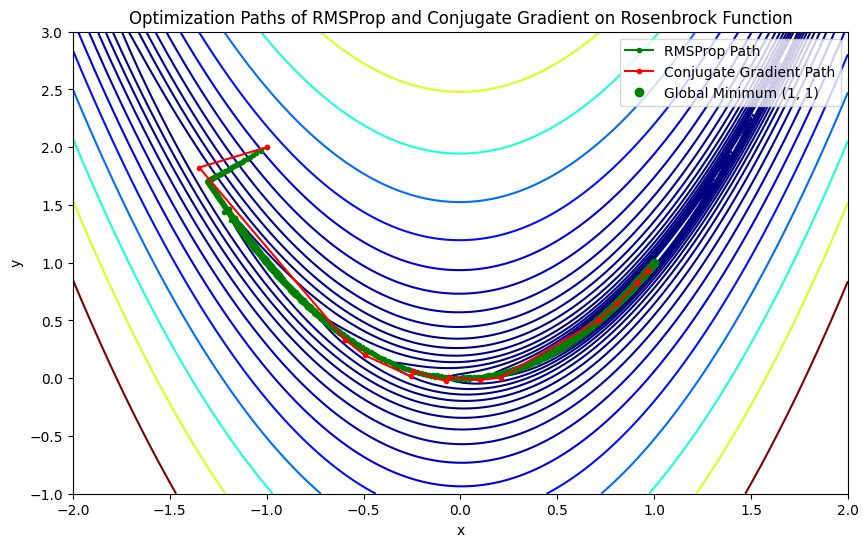

In [ ]:
plt.figure(figsize=(10, 6))
plt.contour(X, Y, Z, levels=np.logspace(-1, 3, 20), cmap="jet")
plt.plot(rmsprop_path[:, 0], rmsprop_path[:, 1], "g.-", label="RMSProp Path")
plt.plot(cg_path[:, 0], cg_path[:, 1], "r.-", label="Conjugate Gradient Path")
plt.plot(1, 1, "go", label="Global Minimum (1, 1)")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Optimization Paths of RMSProp and Conjugate Gradient on Rosenbrock Function")
plt.show()

# **Diminishing Subgradient**


The diminishing subgradient optimizer is an optimization algorithm that uses a diminishing step size to find the minimum of a non-smooth or convex function. It’s often used in convex optimization, particularly when the objective function is not differentiable. Unlike standard gradient-based methods, it does not require a precise gradient (just a subgradient) and is designed to deal with cases where gradients might not exist at all points.

**Advantage:**

Suitable for functions that are non-differentiable, making it more versatile in handling real-world convex optimization problems that aren’t always smooth.

**Disadvantage:**

For non-convex functions, diminishing subgradients may only find local minima and are not efficient in escaping them.


In [ ]:
def rosenbrock_convex(x):
    return np.abs(1 - x[0]) + 100 * np.abs(x[1] - x[0]**2)

# Define the subgradient function (subgradient approximation for convex form)
def rosenbrock_subgradient(x):
    subgrad = np.zeros_like(x)
    subgrad[0] = -1 if x[0] < 1 else 1  # Subgradient for |1 - x[0]|
    subgrad[1] = -100 if x[1] < x[0]**2 else 100  # Subgradient for |100 * (y - x^2)|
    return subgrad

def diminishing_subgradient_optimizer(f, subgrad_f, x0, max_iter=1000, alpha_init=0.1):
    x_k = np.array(x0, dtype=np.float64)
    best_x = x_k
    best_f = f(x_k)
    path = [x_k.copy()]

    for k in range(1, max_iter + 1):
        alpha_k = alpha_init / np.sqrt(k)  # Diminishing step size
        g_k = subgrad_f(x_k)
        x_k = x_k - alpha_k * g_k

        f_new = f(x_k)
        if f_new < best_f:
            best_f = f_new
            best_x = x_k

        path.append(x_k.copy())

    return best_x, best_f, k, np.array(path)

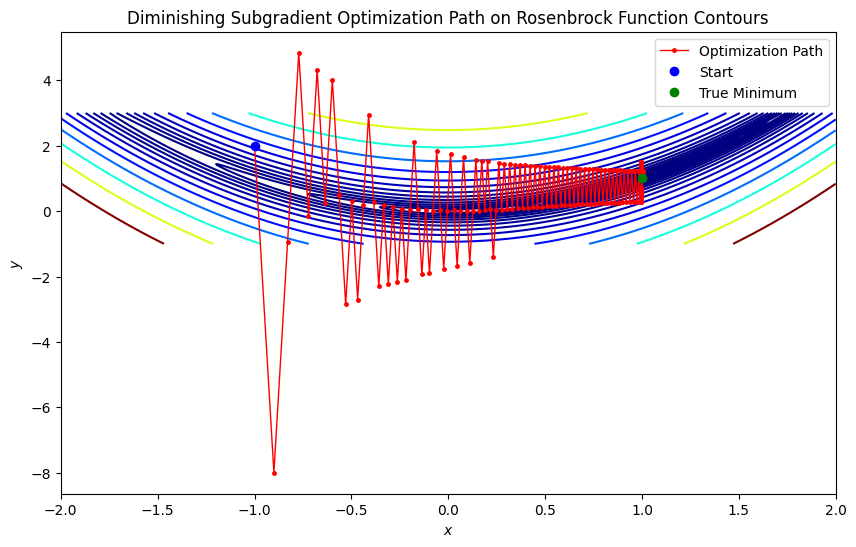

In [ ]:
x0 = np.array([-1.0, 2.0])

optimal_x, optimal_f, iterations, path = diminishing_subgradient_optimizer(rosenbrock_convex, rosenbrock_subgradient, x0)

x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = (1 - X)**2 + 100 * (Y - X**2)**2  \

plt.figure(figsize=(10, 6))
plt.contour(X, Y, Z, levels=np.logspace(-1, 3, 20), cmap='jet')
plt.plot(path[:, 0], path[:, 1], 'r.-', markersize=5, linewidth=1, label="Optimization Path")
plt.plot(x0[0], x0[1], 'bo', label="Start")
plt.plot(1, 1, 'go', label="True Minimum")
plt.legend()
plt.title("Diminishing Subgradient Optimization Path on Rosenbrock Function Contours")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

# **Trust Reigon**
In contrast to line search methods, which determine the direction and then the step size, trust region methods first define a trust region, a bounded area around the current point within which we believe the model's predictions are reliable.It is done by:

Local Model Construction: We approximate the objective function around the current point using a quadratic model.

Trust Region Definition: Instead of taking steps of arbitrary length, we define a trust region, typically in the form of a circle or sphere around the current point.

Step Selection: We solve a constrained subproblem to find the best step within the trust region.

Region Adjustment: Based on how well the step improved the function, we either expand or shrink the trust region.

**Advantages:**
It avoids large, potentially harmful steps by adapting the step size and can handle non-linearities and constraints more effectively than line search methods.

**Disadvantages:**
The trust region method can be computationally expensive and may converge slower for simple problems compared to methods like gradient descent.

In [ ]:
# Hessian matrix of the Rosenbrock function
def rosenbrock_hessian(x, y):
    d2f_dx2 = 2 - 400 * (y - x**2) + 1200 * x**2
    d2f_dxdy = -400 * x
    d2f_dy2 = 200
    return np.array([[d2f_dx2, d2f_dxdy], [d2f_dxdy, d2f_dy2]])

Optimal point found at: [0.99833542 0.99667362]


Text(0.5, 1.0, 'Trust Region Optimization Path with Circles on Rosenbrock Function')

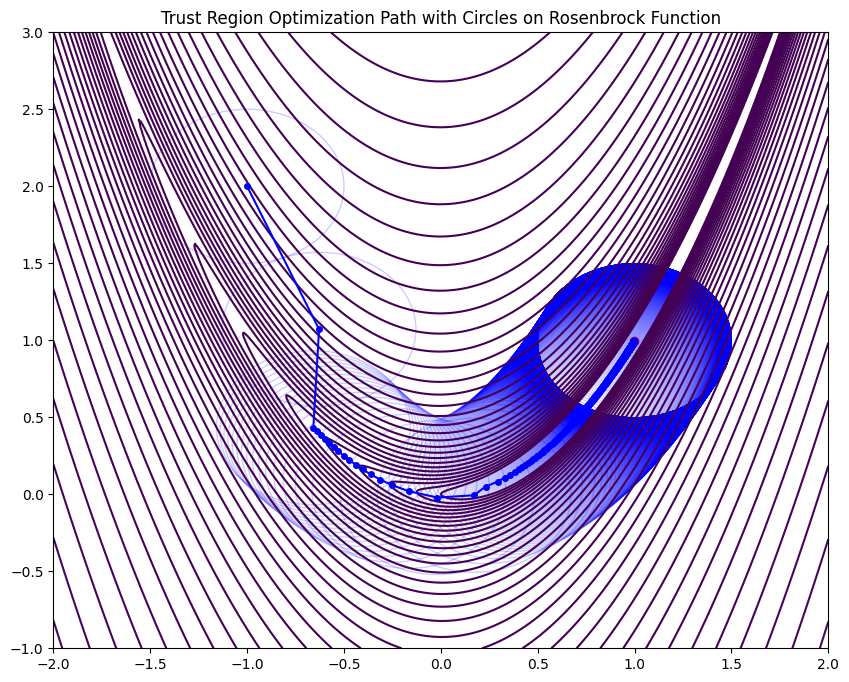

In [ ]:
# Trust Region Optimization for Rosenbrock
def trust_region_method(rosenbrock_func, gradient_func, hessian_func, init_pos, delta_init=1.0, epsilon=1e-6, max_iter=1000):
    point = np.array(init_pos)
    delta = delta_init  # Initial trust region radius
    path = [point]
    radii = [delta]

    for _ in range(max_iter):
        grad = gradient_func(point[0], point[1])
        hessian = hessian_func(point[0], point[1])

        # Solve the trust region subproblem using a damped step size
        try:
            p = np.linalg.solve(hessian, -grad)
        except np.linalg.LinAlgError:
            p = -grad

        # Damping factor for the step size to avoid overshooting
        p_norm = np.linalg.norm(p)
        if p_norm > delta:
            p = p / p_norm * delta  # Scale step to fit within trust region

        # Compute the model's predicted reduction
        f_current = rosenbrock_func(point[0], point[1])
        f_new = rosenbrock_func(point[0] + p[0], point[1] + p[1])
        rho = (f_current - f_new) / (-np.dot(grad, p) + 0.5 * np.dot(p, np.dot(hessian, p)))

        # Update the trust region radius based on rho
        if rho < 0.25:
            delta *= 0.5  # Shrink trust region
        elif rho > 0.75:
            delta = builtins.min(2 * delta, delta_init)  # Expand trust region

        if rho > 0:
            point = point + p

        path.append(point.copy())
        radii.append(delta)

        if np.linalg.norm(grad) < epsilon:
            break

    return np.array(path), np.array(radii), point

initial_pos = [-1.0, 2.0]
delta_init = 1.0
epsilon = 1e-6
max_iter = 1000

path, radii, optimal_point = trust_region_method(rosenbrock, rosenbrock_gradient, rosenbrock_hessian, initial_pos, delta_init, epsilon, max_iter)

print("Optimal point found at:", optimal_point)

# Plotting the optimization path with trust region circles
x_vals = np.linspace(-2, 2, 400)
y_vals = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = rosenbrock(X, Y)

plt.figure(figsize=(10, 8))
plt.contour(X, Y, Z, levels=np.logspace(0, 5, 50), cmap='viridis')

plt.plot(path[:, 0], path[:, 1], 'bo-', markersize=4, label="Optimization Path")
plt.scatter(optimal_point[0], optimal_point[1], color='red', label="Optimal Point")

scaling_factor = 0.5
for i in range(len(path)):
    circle = plt.Circle((path[i, 0], path[i, 1]), radii[i]*scaling_factor, color='blue', alpha=0.2, fill=False)
    plt.gca().add_patch(circle)

plt.title("Trust Region Optimization Path with Circles on Rosenbrock Function")
